# Covid Data Analysis

## Objective:
- Identify variable that can explain the number of deaths
- Find patterns within the data frame

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Wraggling & Data Cleaning
#### 3. Exploring Relationships
#### 4. Supervised ML
#### 5. Unsuperviesd Ml

# Importing Libraries and Data

In [484]:
#Importing all important libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [255]:
%matplotlib inline

In [256]:
pd.set_option('display.max_rows', 70)

In [257]:
pd.set_option('display.max_columns', 70)

In [258]:
# Loading the df
df=pd.read_csv(r'/Users/pgtips/Desktop/owid-covid-data.csv')

In [259]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


# Wraggling

In [260]:
# We start with the analysis in the beginning of 2021 till till last month of April 2022
df=df.loc[(df['date'] >= '2021-01-01') & (df['date'] < '2022-04-31')]

In [261]:
# As well we just want to focus on the european continent
df=df[df['continent'].str.contains('Europe')==True]

In [262]:
# Drop Vatican as we dont have data
df=df[df['location'].str.contains('Vatican')==False]

In [263]:
# We will also Drop Russia as we cant make sure that the reported numbers represent the actual numbers
df=df[df['location'].str.contains('Russia')==False]

In [264]:
df.shape

(23670, 67)

In [265]:
# Looking at the columns we want to reduce the number of columns that are of interest to us
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [266]:
# Define the data we are most interested in
df=df[['continent', 'location', 'date', 'total_cases','total_deaths','population', 'population_density','aged_65_older',
       'cardiovasc_death_rate', 'gdp_per_capita', 'female_smokers','male_smokers','life_expectancy', 
       'human_development_index']]

In [267]:
df.head()

,continent,location,date,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
1964,Europe,Albania,2021-01-01,58316.0,1181.0,2872934.0,104.871,13.188,304.195,11803.431,7.1,51.2,78.57,0.795
1965,Europe,Albania,2021-01-02,58991.0,1190.0,2872934.0,104.871,13.188,304.195,11803.431,7.1,51.2,78.57,0.795
1966,Europe,Albania,2021-01-03,59438.0,1193.0,2872934.0,104.871,13.188,304.195,11803.431,7.1,51.2,78.57,0.795
1967,Europe,Albania,2021-01-04,59623.0,1199.0,2872934.0,104.871,13.188,304.195,11803.431,7.1,51.2,78.57,0.795
1968,Europe,Albania,2021-01-05,60283.0,1210.0,2872934.0,104.871,13.188,304.195,11803.431,7.1,51.2,78.57,0.795


In [268]:
# cardiovasc_death_rate/Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)
df['cardiovasc_death_rate'] = df['cardiovasc_death_rate']/100

In [269]:
# In oder to calculate better with the number we will create a df with shares and totals
pop= df['total_deaths']*100
df['share_deaths'] = pop/df['population']

In [270]:
# We creat a total share of smokers in the population
df['smokers']=df['male_smokers']+df['female_smokers']

In [271]:
df.describe()

,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers
count,2.279500e+04,22790.000000,2.367000e+04,22795.000000,18915.000000,19400.000000,19885.000000,18915.000000,18915.000000,22310.000000,19885.000000,22790.000000,18915.000000
mean,1.440495e+06,22029.989425,1.239119e+07,639.848489,17.810436,2.251310,33570.244317,23.402564,35.010256,80.036957,0.881244,0.162885,58.412821
std,2.984175e+06,36338.750282,2.013129e+07,2807.749355,2.763694,1.222902,17979.085244,7.693873,10.009409,3.352491,0.056560,0.101299,13.803099
min,3.770000e+02,1.000000,3.369100e+04,3.404000,10.864000,0.860600,5189.972000,5.900000,15.200000,71.900000,0.750000,0.002039,29.500000
25%,1.000105e+05,900.000000,6.348140e+05,68.496000,15.070000,1.211008,22669.797000,19.600000,27.300000,77.400000,0.851000,0.091299,47.600000
50%,3.731050e+05,5952.000000,4.982904e+06,108.043000,18.577000,1.624250,31400.840000,23.000000,34.800000,81.320000,0.892000,0.149004,58.800000
75%,1.322498e+06,20143.500000,1.016792e+07,205.859000,19.718000,3.244248,45229.245000,28.400000,44.400000,82.400000,0.931000,0.219362,66.800000
max,2.869937e+07,175081.000000,8.390047e+07,19347.500000,23.021000,5.398490,94277.965000,44.000000,52.700000,86.750000,0.957000,0.535230,91.900000


### Missing Values

In [272]:
df.shape

(23670, 16)

In [273]:
df.isnull().sum()

continent                     0
location                      0
date                          0
total_cases                 875
total_deaths                880
population                    0
population_density          875
aged_65_older              4755
cardiovasc_death_rate      4270
gdp_per_capita             3785
female_smokers             4755
male_smokers               4755
life_expectancy            1360
human_development_index    3785
share_deaths                880
smokers                    4755
dtype: int64

We can see that the data set contains lot of missing values. This is due to the methode of collection as well as the ability to track and share the data. As we try to look at the world data many countries report there data diffrently

One of the most important varaibles for us are the number of deaths as want to identify factors that correlate with deaths

### Duplicate Check

In [274]:
dups = df.duplicated()

In [275]:
dups.shape # No duplicate variables

(23670,)

### Mixed Data Type

In [613]:
# Looking for mixed data type as we had trouble with the code below
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

life_expec_loc


# Exploring Relations

### Correlation Matrix

In [276]:
# The matrix show the intensity of relation between the variables
df.corr()

,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers
total_cases,1.000000,0.819412,0.734857,-0.079787,0.283427,-0.229736,0.065134,0.067377,-0.137493,0.122900,0.172437,0.161039,-0.062148
total_deaths,0.819412,1.000000,0.927160,-0.102509,0.356529,-0.171550,-0.013555,0.049286,-0.117182,0.057057,0.099880,0.237544,-0.057504
population,0.734857,0.927160,1.000000,-0.106169,0.372381,-0.193479,0.036425,0.035339,-0.128889,0.079083,0.164925,0.051975,-0.073767
population_density,-0.079787,-0.102509,-0.106169,1.000000,0.138350,-0.230548,0.196490,-0.040457,-0.150617,0.316690,0.166177,-0.081747,-0.131772
aged_65_older,0.283427,0.356529,0.372381,0.138350,1.000000,-0.336589,0.115651,0.347734,-0.268401,0.388176,0.411929,0.069151,-0.001970
cardiovasc_death_rate,-0.229736,-0.171550,-0.193479,-0.230548,-0.336589,1.000000,-0.737302,-0.001223,0.668978,-0.955747,-0.835513,0.282375,0.484433
gdp_per_capita,0.065134,-0.013555,0.036425,0.196490,0.115651,-0.737302,1.000000,-0.038246,-0.704200,0.734892,0.827926,-0.287273,-0.533903
female_smokers,0.067377,0.049286,0.035339,-0.040457,0.347734,-0.001223,-0.038246,1.000000,0.202189,0.088792,0.038675,0.396016,0.704021
male_smokers,-0.137493,-0.117182,-0.128889,-0.150617,-0.268401,0.668978,-0.704200,0.202189,1.000000,-0.630593,-0.759616,0.270730,0.837857
life_expectancy,0.122900,0.057057,0.079083,0.316690,0.388176,-0.955747,0.734892,0.088792,-0.630593,1.000000,0.817515,-0.280576,-0.407786


We can identify relation with the number of deaths (total) between:

- total cases
- population
- smokers
- gdp
- life expectancy

But lolooking at the share of death of the popopulation we can identify higher correlations

In [277]:
# Here we want to create a sub_set in order to analyse the data that are represented as a share
df_shares= df[['location','date','share_deaths','aged_65_older','cardiovasc_death_rate','smokers','gdp_per_capita','life_expectancy']]

In [278]:
# Correlation done with the chars of a pop
df_shares.corr()

,share_deaths,aged_65_older,cardiovasc_death_rate,smokers,gdp_per_capita,life_expectancy
share_deaths,1.000000,0.069151,0.282375,0.417061,-0.287273,-0.280576
aged_65_older,0.069151,1.000000,-0.336589,-0.001970,0.115651,0.388176
cardiovasc_death_rate,0.282375,-0.336589,1.000000,0.484433,-0.737302,-0.955747
smokers,0.417061,-0.001970,0.484433,1.000000,-0.533903,-0.407786
gdp_per_capita,-0.287273,0.115651,-0.737302,-0.533903,1.000000,0.734892
life_expectancy,-0.280576,0.388176,-0.955747,-0.407786,0.734892,1.000000


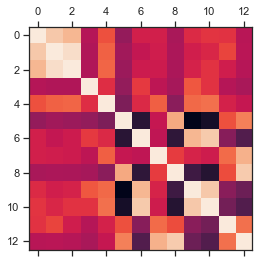

In [279]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

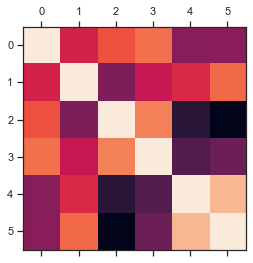

In [280]:
# Only the shares

plt.matshow(df_shares.corr())
plt.show()

## Relationship between variables with Correlation Coeffizient:


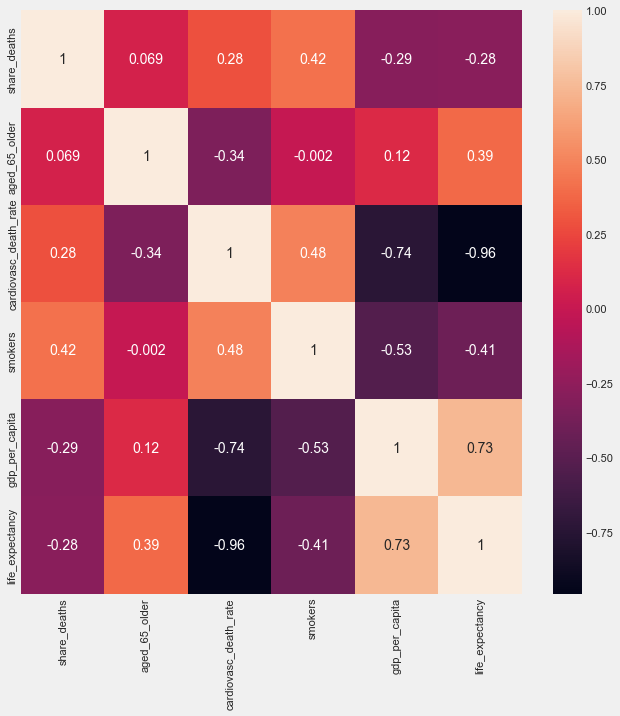

In [609]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_shares.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.savefig('result_1.png', pad_inches=0.0)

### Results:
By seperating the share or precent data from the total data we get a better and reliable view of the relations between them

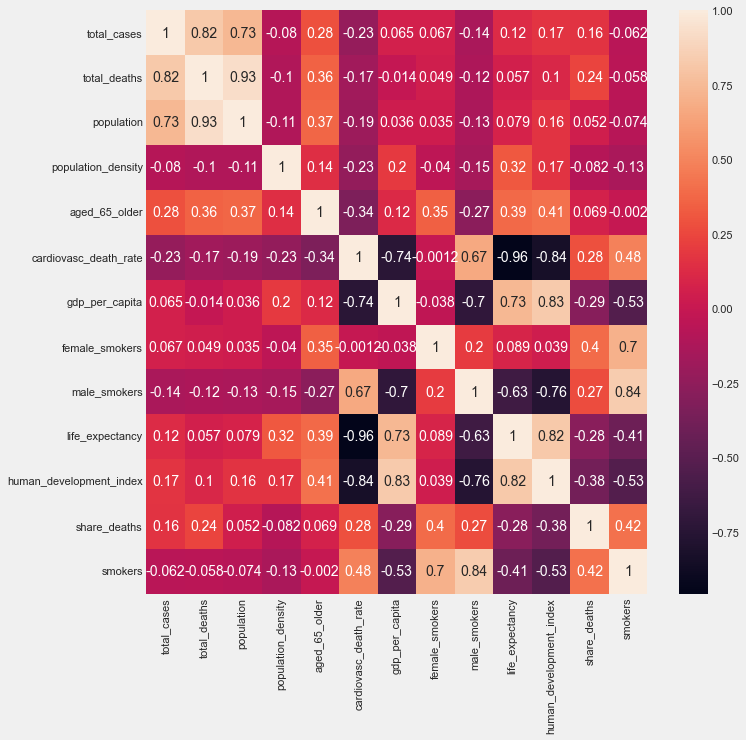

In [608]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.savefig('result.png', pad_inches=0.0)

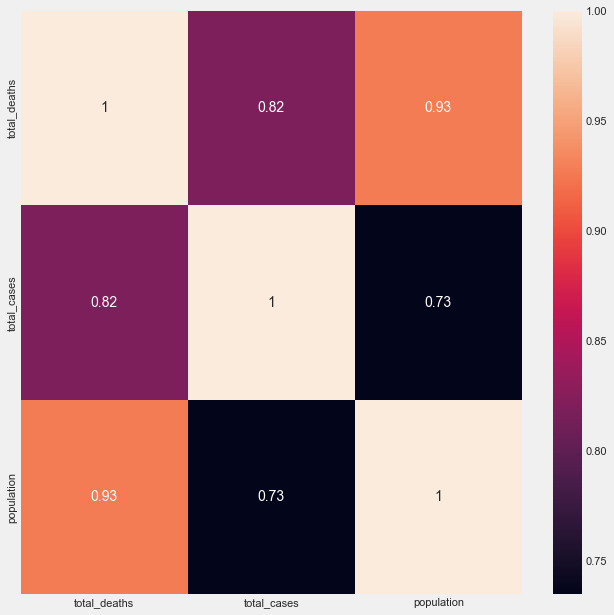

In [612]:
# Creating a subset in order to analyse the correaltion between the total vlaues (Population, Cases and Deaths)
df_sub_total_correlation= df[['total_deaths','total_cases','population']]
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_sub_total_correlation.corr(), annot = True, ax = ax)
plt.savefig('result.png', pad_inches=0.0)

### Results:
Here we can see that population has the the highest correlation to deaths. A correlation of .93 can be seen critical as its a to good fit.

### Scatterplots:

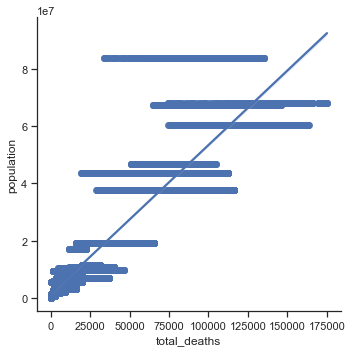

In [283]:
# Create a scatterplot for the two highest correlation with covid_deaths
sns.lmplot(x = 'total_deaths', y = 'population', data = df)

The scatter plot shows a positive correlation between deaths and population which means the higher the population the more deaths occure

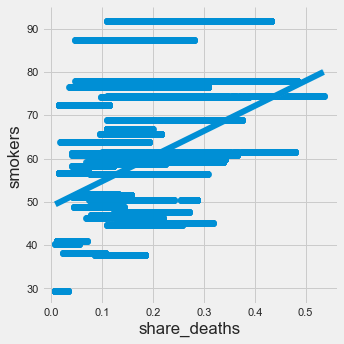

In [614]:
# Scatter plot for the share/procent values
sns.lmplot(x = 'share_deaths', y = 'smokers', data = df_shares)

### Pair Plots:
The pair plot helps us to identify distribution (diagonal line) and trends

In [285]:
df.head(1)

,continent,location,date,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers
1964,Europe,Albania,2021-01-01,58316.0,1181.0,2872934.0,104.871,13.188,3.04195,11803.431,7.1,51.2,78.57,0.795,0.041108,58.3


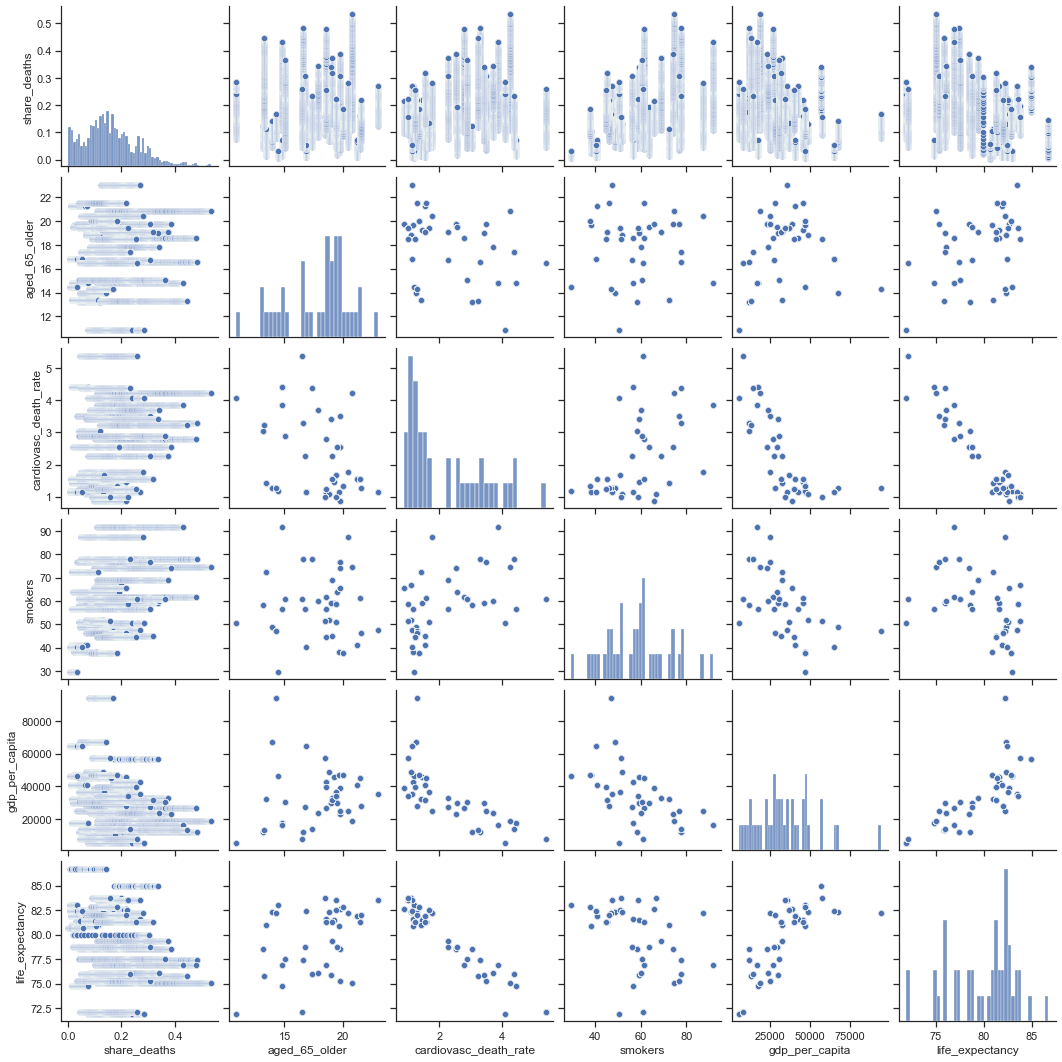

In [286]:
# Create a pair plot 

g = sns.pairplot(df_shares)

### Results:
It an other represenation of the correaltion matrix but here we can see distribution and can identfy trend lines

### Categorical Plots:

<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

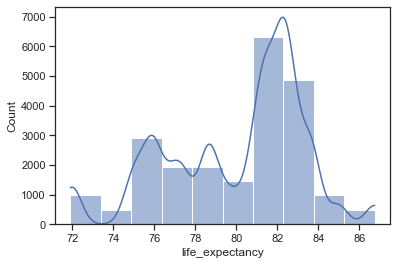

In [287]:
# Building a categorial variable based on life_expectancy
sns.histplot(df['life_expectancy'], bins = 10, kde = True)

In [288]:
# Based on percentils
df['life_expectancy'].describe()

count    22310.000000
mean        80.036957
std          3.352491
min         71.900000
25%         77.400000
50%         81.320000
75%         82.400000
max         86.750000
Name: life_expectancy, dtype: float64

In [352]:
df.loc[(df['life_expectancy'] >= 70) & (df['life_expectancy'] <= 76), 'life_expec_loc'] = 'Low life expectency'

In [353]:
df.loc[(df['life_expectancy'] >= 77) & (df['life_expectancy'] <= 81), 'life_expec_loc'] = 'Average life expectency'

In [354]:
df.loc[df['life_expectancy'] >= 82, 'life_expec_loc'] = 'High life expectency'

In [355]:
df['life_expec_loc'].value_counts(dropna = False)

High life expectency       8245
NaN                        6210
Average life expectency    5335
Low life expectency        3880
Name: life_expec_loc, dtype: int64

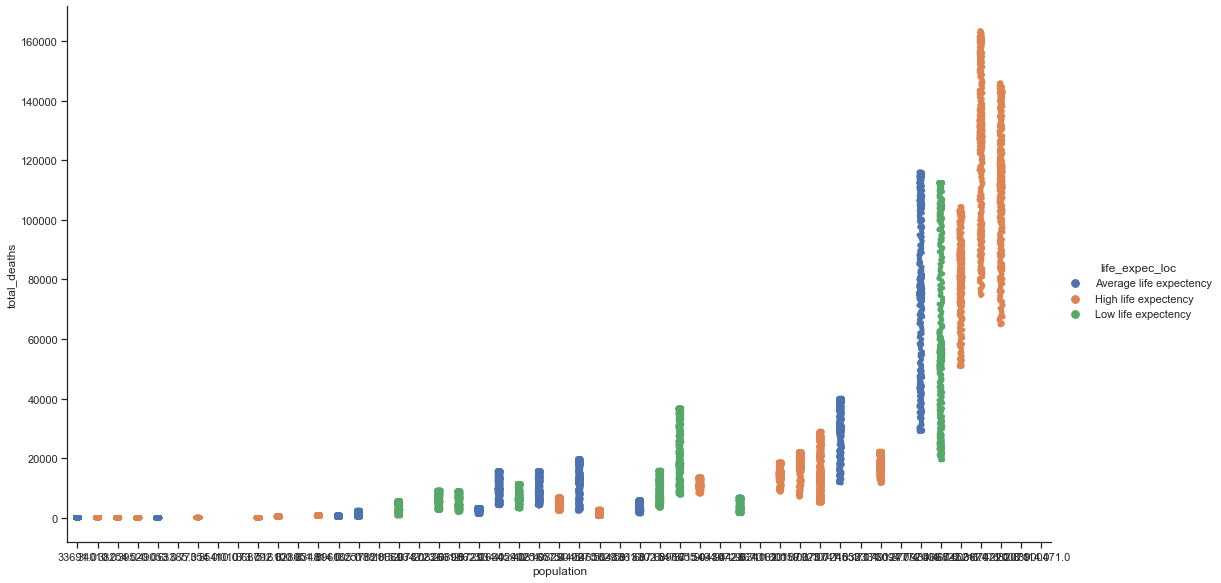

In [293]:
# Create a categorical plot in seaborn using the life expec categories created above

sns.set(style="ticks")
p = sns.catplot(x="population", y="total_deaths", hue="life_expec_loc", data=df,height=8.27, aspect=15/8.27)

# Geo Analysis

We need to adepte to the european continent

In [294]:
# Import ".json" file for the World
import datapackage

data_url = 'https://datahub.io/core/geo-countries/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

In [295]:
path = '/Users/pgtips/Desktop/Task 6.2 Relation and Explorative Analysis/'

In [296]:
# Creating a subset with location and prozent deaths so that the population is taking into account
df_geo=df[['total_deaths','location']]

In [297]:
df_geo=df_geo.rename(columns = {'location':'name'})

In [298]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = data_url, 
    data = df_geo,
    columns = ['name','total_deaths'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

KeyError: 'type'

In [ ]:
map.save(os.path.join(path,'plot_data.html'))

# Machine Learning Supervised

<AxesSubplot:xlabel='share_deaths', ylabel='Density'>

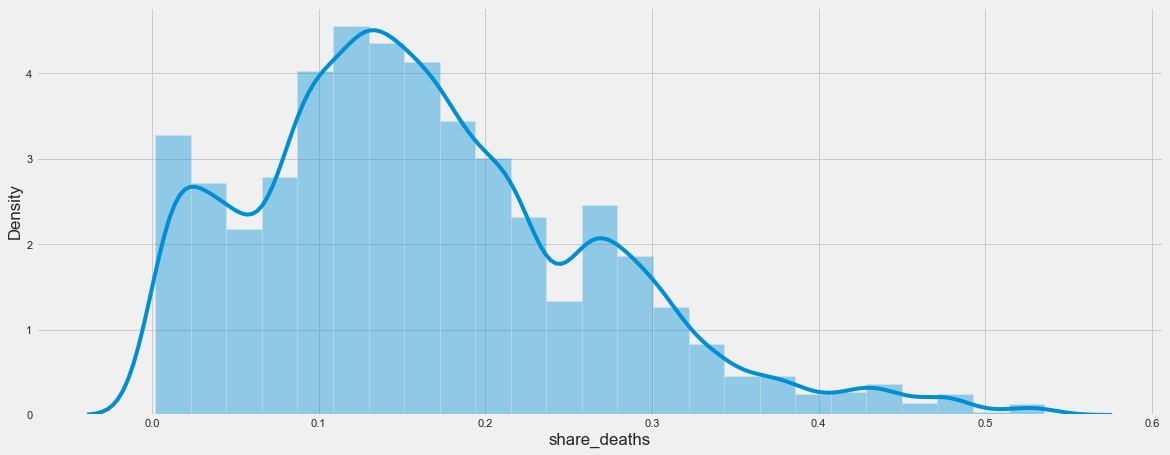

In [615]:
sns.distplot(df['share_deaths'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

- We can see a slight left screw distribution but all together we have a normal distribution.

In [299]:
df.describe()

,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers
count,2.279500e+04,22790.000000,2.367000e+04,22795.000000,18915.000000,19400.000000,19885.000000,18915.000000,18915.000000,22310.000000,19885.000000,22790.000000,18915.000000
mean,1.440495e+06,22029.989425,1.239119e+07,639.848489,17.810436,2.251310,33570.244317,23.402564,35.010256,80.036957,0.881244,0.162885,58.412821
std,2.984175e+06,36338.750282,2.013129e+07,2807.749355,2.763694,1.222902,17979.085244,7.693873,10.009409,3.352491,0.056560,0.101299,13.803099
min,3.770000e+02,1.000000,3.369100e+04,3.404000,10.864000,0.860600,5189.972000,5.900000,15.200000,71.900000,0.750000,0.002039,29.500000
25%,1.000105e+05,900.000000,6.348140e+05,68.496000,15.070000,1.211008,22669.797000,19.600000,27.300000,77.400000,0.851000,0.091299,47.600000
50%,3.731050e+05,5952.000000,4.982904e+06,108.043000,18.577000,1.624250,31400.840000,23.000000,34.800000,81.320000,0.892000,0.149004,58.800000
75%,1.322498e+06,20143.500000,1.016792e+07,205.859000,19.718000,3.244248,45229.245000,28.400000,44.400000,82.400000,0.931000,0.219362,66.800000
max,2.869937e+07,175081.000000,8.390047e+07,19347.500000,23.021000,5.398490,94277.965000,44.000000,52.700000,86.750000,0.957000,0.535230,91.900000


### Missing Values

In [300]:
df.isna().sum()

continent                     0
location                      0
date                          0
total_cases                 875
total_deaths                880
population                    0
population_density          875
aged_65_older              4755
cardiovasc_death_rate      4270
gdp_per_capita             3785
female_smokers             4755
male_smokers               4755
life_expectancy            1360
human_development_index    3785
share_deaths                880
smokers                    4755
life_expec_loc             6210
dtype: int64

In [301]:
df_nona = df.dropna()

# Regression analysis with Smokers

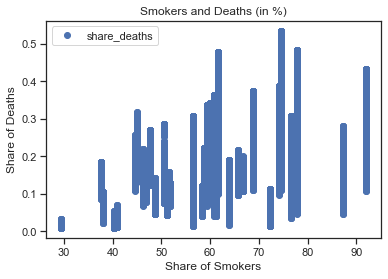

In [302]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'smokers', y='share_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Smokers and Deaths (in %)')  
plt.xlabel('Share of Smokers')  
plt.ylabel('Share of Deaths')  
plt.show()

- We can see a slight increase in deaths with the share of smokers

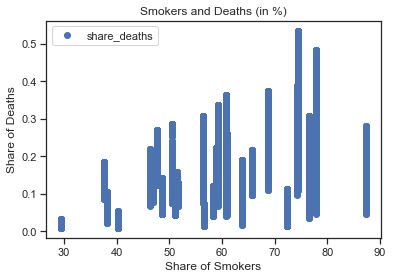

In [303]:
# Here we want to compare the graph which contains no missing values
df_nona.plot(x = 'smokers', y='share_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Smokers and Deaths (in %)')  
plt.xlabel('Share of Smokers')  
plt.ylabel('Share of Deaths')  
plt.show()

- We still can see a trend

In [304]:
# Looking to explain the number of deaths through the share of smokers in the population

X = df_nona['smokers'].values.reshape(-1,1)
y = df_nona['share_deaths'].values.reshape(-1,1)

In [305]:
X

array([[58.3],
       [58.3],
       [58.3],
       ...,
       [60.9],
       [60.9],
       [60.9]])

In [306]:
y

array([[0.0411078 ],
       [0.04142107],
       [0.04152549],
       ...,
       [0.25872377],
       [0.25872377],
       [0.25872377]])

In [307]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis 

In [308]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [309]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [310]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

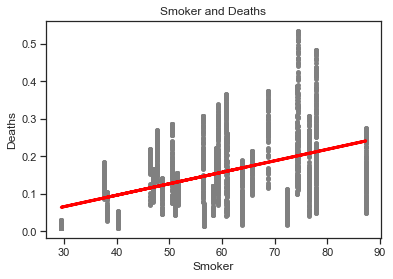

In [311]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Smoker and Deaths')
plot_test.xlabel('Smoker')
plot_test.ylabel('Deaths')
plot_test.show()

In [312]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [313]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00305374]]
Mean squared error:  0.007481934956639386
R2 score:  0.16280994746594568


### Results:
- We can see and have significant results that with higher number of smoker the number of deaths thorugh COVID increase too. 
- With a R2 score of .13 we can explain 13% of the variance in deaths through the share of smokers

# Regression with Cardio Deaths Rates

df_nona.head(1)

In [316]:
df_nona.head(1)

,continent,location,date,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers,life_expec_loc
1964,Europe,Albania,2021-01-01,58316.0,1181.0,2872934.0,104.871,13.188,3.04195,11803.431,7.1,51.2,78.57,0.795,0.041108,58.3,Average life expectency


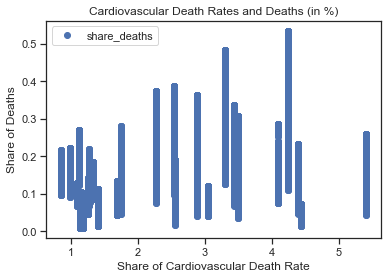

In [317]:
# Here we want to compare the graph which contains no missing values
df_nona.plot(x = 'cardiovasc_death_rate', y='share_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cardiovascular Death Rates and Deaths (in %)')  
plt.xlabel('Share of Cardiovascular Death Rate')  
plt.ylabel('Share of Deaths')  
plt.show()

- We can see a trend that drops after 5

In [318]:
# Looking to explain the number of deaths through the share of smokers in the population

X = df_nona['cardiovasc_death_rate'].values.reshape(-1,1)
y = df_nona['share_deaths'].values.reshape(-1,1)

In [319]:
X

array([[3.04195],
       [3.04195],
       [3.04195],
       ...,
       [5.39849],
       [5.39849],
       [5.39849]])

In [320]:
y

array([[0.0411078 ],
       [0.04142107],
       [0.04152549],
       ...,
       [0.25872377],
       [0.25872377],
       [0.25872377]])

In [321]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###  Regression analysis 

In [322]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [323]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [324]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

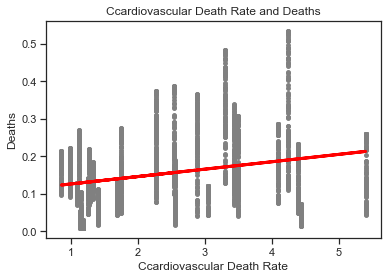

In [325]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ccardiovascular Death Rate and Deaths')
plot_test.xlabel('Ccardiovascular Death Rate')
plot_test.ylabel('Deaths')
plot_test.show()

- We see a slight trend with higher deaths when we have in increase in CVD Rates

In [326]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [327]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01973803]]
Mean squared error:  0.008350521939564728
R2 score:  0.06561953000309695


- We still have a significant result but with a R2 being only 0.6% of explainiation in variance

# Regression with total deaths and population

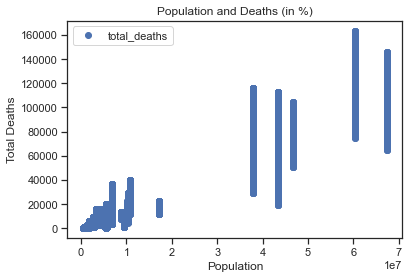

In [328]:
# Here we want to compare the graph which contains no missing values
df_nona.plot(x = 'population', y='total_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population and Deaths (in %)')  
plt.xlabel('Population')  
plt.ylabel('Total Deaths')  
plt.show()

In [329]:
# Looking to explain the number of deaths through the share of smokers in the population

X = df_nona['population'].values.reshape(-1,1)
y = df_nona['total_deaths'].values.reshape(-1,1)

In [330]:
X

array([[ 2872934.],
       [ 2872934.],
       [ 2872934.],
       ...,
       [43466822.],
       [43466822.],
       [43466822.]])

In [331]:
y

array([[  1181.],
       [  1190.],
       [  1193.],
       ...,
       [112459.],
       [112459.],
       [112459.]])

In [332]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###  Regression analysis 

In [333]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [334]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [335]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

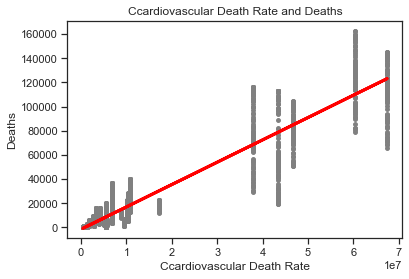

In [336]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ccardiovascular Death Rate and Deaths')
plot_test.xlabel('Ccardiovascular Death Rate')
plot_test.ylabel('Deaths')
plot_test.show()

In [337]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [338]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00184804]]
Mean squared error:  137472399.5356746
R2 score:  0.8920031918115792


- The population has the highest impact on the number of deaths which can be seen in the correlation diagramm and in the regression model
- Its logical that with higher number of population the number of deaths increase too
- With an accuracy of nearly 90% we can explain the variance in the total number of deaths with the number of population

# Cluster Analysis

In [616]:
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [617]:
df.head(1)

,continent,location,date,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers,life_expec_loc
1964,Europe,Albania,2021-01-01,58316.0,1181.0,2872934.0,104.871,13.188,3.04195,11803.431,7.1,51.2,78.57,0.795,0.041108,58.3,Average life expectency


<AxesSubplot:xlabel='share_deaths', ylabel='Density'>

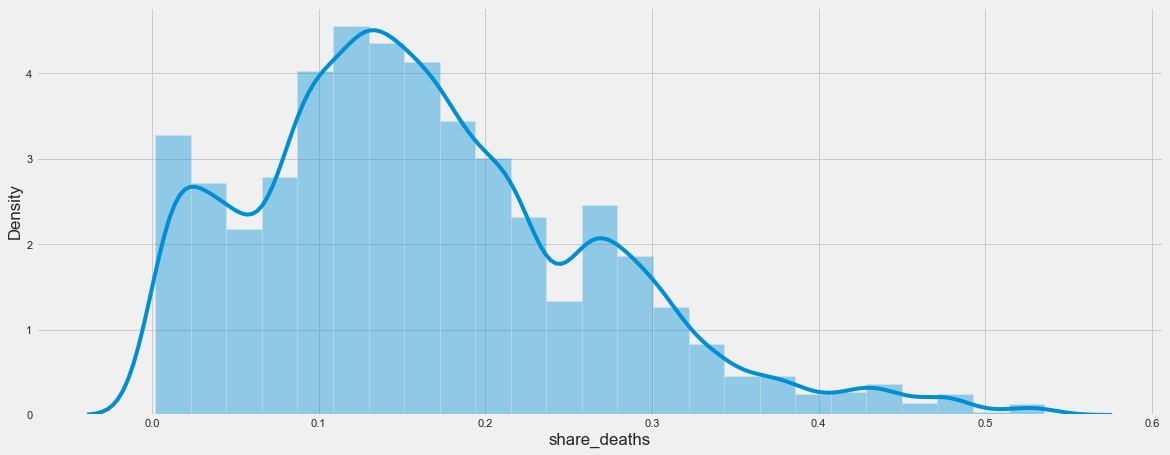

In [618]:
sns.distplot(df['share_deaths'], bins=25)

We have a relativly even distribution 

### The elbow technique

In [619]:
df.head(1)

,continent,location,date,total_cases,total_deaths,population,population_density,aged_65_older,cardiovasc_death_rate,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index,share_deaths,smokers,life_expec_loc
1964,Europe,Albania,2021-01-01,58316.0,1181.0,2872934.0,104.871,13.188,3.04195,11803.431,7.1,51.2,78.57,0.795,0.041108,58.3,Average life expectency


'population_density','aged_65_older','cardiovasc_death_rate','gdp_per_capita','life_expectancy','human_development_index','share_deaths','smokers

In [400]:
# We create two diffrent df one with the total numbers and one with the share (%) values
df_cluster = df[['total_deaths','population','aged_65_older','cardiovasc_death_rate','gdp_per_capita','life_expectancy','human_development_index','share_deaths','smokers']]
df_cluster_total= df[['total_deaths','population']]
df_cluster_share = df[['aged_65_older','cardiovasc_death_rate','gdp_per_capita','life_expectancy','human_development_index','share_deaths','smokers']]

In [620]:
df_cluster.dropna(inplace=True)
df_cluster.dropna(inplace=True)
df_cluster_share.dropna(inplace=True)

In [621]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [622]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8.622566147969363e+18,
 -1.1151705511837619e+18,
 -4.953052502576837e+17,
 -2.6621628525952045e+17,
 -1.4080186462570139e+17,
 -8.183084899418024e+16,
 -5.139027954078823e+16,
 -3.3458499086303944e+16,
 -1.6185461832006562e+16]

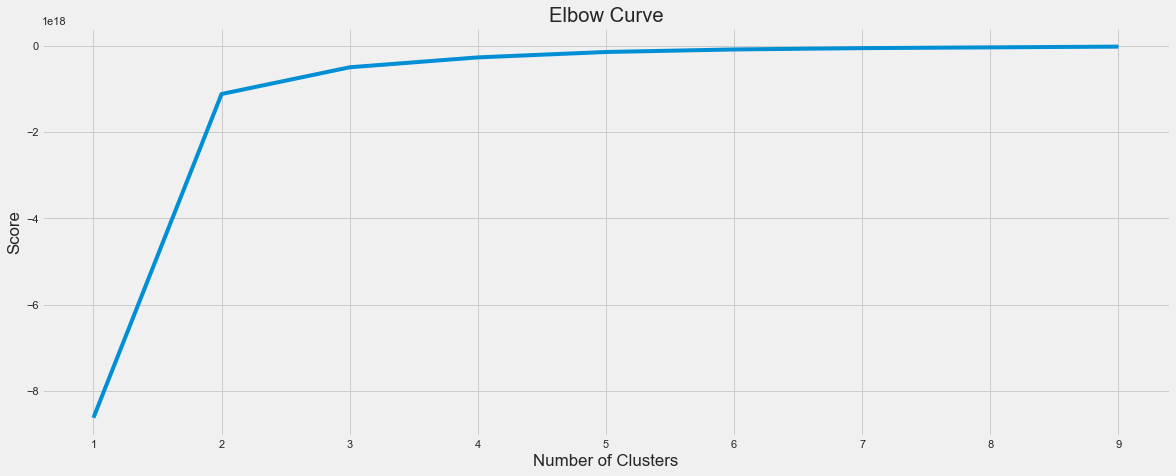

In [623]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Its not to clear but the Elbow curve suggest 3 Clusters as the results later show

### 3. k-means clustering

In [624]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [625]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=3)

In [626]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [627]:
df_cluster.head()

,total_deaths,population,aged_65_older,cardiovasc_death_rate,gdp_per_capita,life_expectancy,human_development_index,share_deaths,smokers,clusters
1964,1181.0,2872934.0,13.188,3.04195,11803.431,78.57,0.795,0.041108,58.3,0
1965,1190.0,2872934.0,13.188,3.04195,11803.431,78.57,0.795,0.041421,58.3,0
1966,1193.0,2872934.0,13.188,3.04195,11803.431,78.57,0.795,0.041525,58.3,0
1967,1199.0,2872934.0,13.188,3.04195,11803.431,78.57,0.795,0.041734,58.3,0
1968,1210.0,2872934.0,13.188,3.04195,11803.431,78.57,0.795,0.042117,58.3,0


In [628]:
df_cluster['clusters'].value_counts()

0    15035
1     1940
2     1455
Name: clusters, dtype: int64

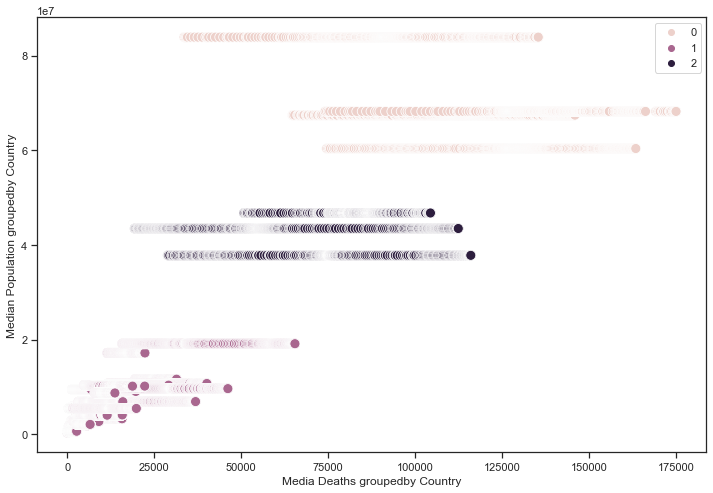

In [408]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['total_deaths'], y=df_cluster['population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Media Deaths groupedby Country') # Label x-axis.
plt.ylabel('Median Population groupedby Country') # Label y-axis.
plt.show()

#### Results:
- The graphe surgest a seperation in population as we have high population as spain, great britain and italy with population around 30 to 50 mil and smaller countries like swede, denmark, beligum

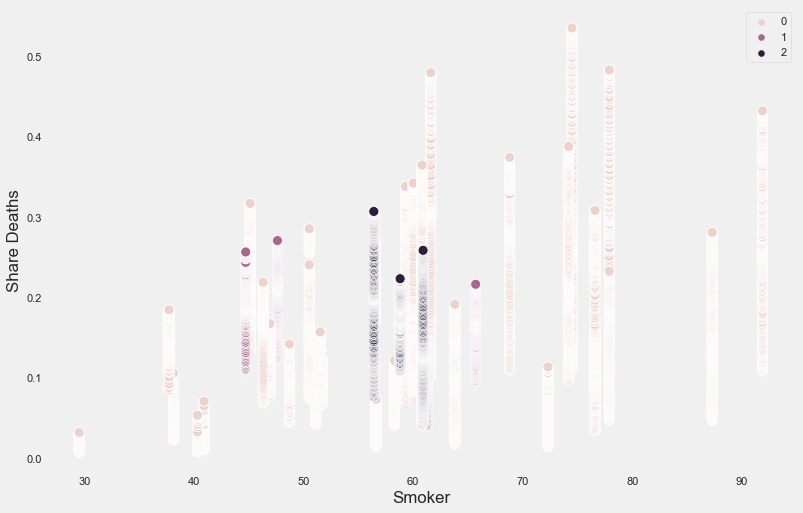

In [629]:
# Plot the clusters for the Smoker and Share Deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['smokers'], y=df_cluster['share_deaths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Smoker') 
plt.ylabel('Share Deaths') 
plt.show()

Dividing the df into population group make the most sense

### Results:

In [630]:
# Here we look at the statical properties based 
df_cluster.groupby('clusters').agg({'total_deaths':['mean', 'median'], 
                         'population':['mean', 'median'], 
                         'share_deaths':['mean', 'median'],
                          'smokers':['mean', 'median']})

total_deaths              population             share_deaths  \
                   mean    median          mean      median         mean   
clusters                                                                   
0          10536.036315    6291.0  6.208593e+06   5465629.0     0.159707   
1         117839.180412  122812.0  6.997426e+07  67814557.0     0.172862   
2          76022.728522   77145.0  4.266968e+07  43466822.0     0.179331   

                      smokers         
            median       mean median  
clusters                              
0         0.137552  58.577419  58.30  
1         0.178632  54.825000  54.45  
2         0.185640  58.700000  58.80

# Unsupervised ML

In [548]:
# We will once again import the data, because we know that in the column country we have time series with all the data from the EU
# Loading the df
df_1=pd.read_csv(r'/Users/pgtips/Desktop/owid-covid-data.csv')



In [549]:
# We start with the analysis in the beginning of 2021 till till last month of April 2022
df_1=df_1.loc[(df_1['date'] >= '2021-01-01') & (df_1['date'] < '2022-04-31')]

In [550]:
df_1=df_1[df_1['iso_code'].str.contains('OWID_EUR')==True]

In [551]:
df_1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
55109,OWID_EUR,NaN,Europe,2021-01-01,24073347.0,236850.0,213026.429,550118.0,4024.0,4502.143,32142.239,316.237,284.429,734.506,5.373,6.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511345.0,510114.0,119.0,1.0,120426.0,154952.0,0.07,0.07,0.0,0.0,207.0,148588.0,0.020,NaN,748962983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55110,OWID_EUR,NaN,Europe,2021-01-02,24234084.0,160737.0,215918.286,553015.0,2897.0,4528.857,32356.851,214.613,288.290,738.374,3.868,6.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1361874.0,1360639.0,139.0,1.0,188704.0,170531.0,0.18,0.18,0.0,0.0,228.0,164144.0,0.022,NaN,748962983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55111,OWID_EUR,NaN,Europe,2021-01-03,24401969.0,167885.0,220624.143,556014.0,2999.0,4534.571,32581.008,224.157,294.573,742.378,4.004,6.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465957.0,1464127.0,143.0,4.0,104722.0,160966.0,0.20,0.20,0.0,0.0,215.0,154580.0,0.021,NaN,748962983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55112,OWID_EUR,NaN,Europe,2021-01-04,24603013.0,201044.0,225216.571,559606.0,3592.0,4527.143,32849.438,268.430,300.705,747.174,4.796,6.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739924.0,1738040.0,235.0,6.0,247052.0,193511.0,0.23,0.23,0.0,0.0,258.0,185784.0,0.025,NaN,748962983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55113,OWID_EUR,NaN,Europe,2021-01-05,24879886.0,276873.0,229612.000,566091.0,6485.0,4592.286,33219.113,369.675,306.573,755.833,8.659,6.132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2047594.0,2045647.0,326.0,8.0,361372.0,267294.0,0.27,0.27,0.0,0.0,357.0,259562.0,0.035,NaN,748962983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have the time series of the european continent that we will analyse

In [552]:
# Creating a sub set to analyse the course of covid deaths over time
df_sub_UML=df_1[[
        'date',
       'total_deaths']]

In [553]:
df_sub_UML['datetime'] = pd.to_datetime(df_sub_UML['date']) # Create a datetime column from "Date.""
df_sub_UML = df_sub_UML.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub_UML.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub_UML.head()

,total_deaths
datetime,
2021-01-01,550118.0
2021-01-02,553015.0
2021-01-03,556014.0
2021-01-04,559606.0
2021-01-05,566091.0


In [554]:
df_sub_UML

,total_deaths
datetime,
2021-01-01,550118.0
2021-01-02,553015.0
2021-01-03,556014.0
2021-01-04,559606.0
2021-01-05,566091.0
...,...
2022-04-26,1814611.0
2022-04-27,1816372.0
2022-04-28,1817962.0


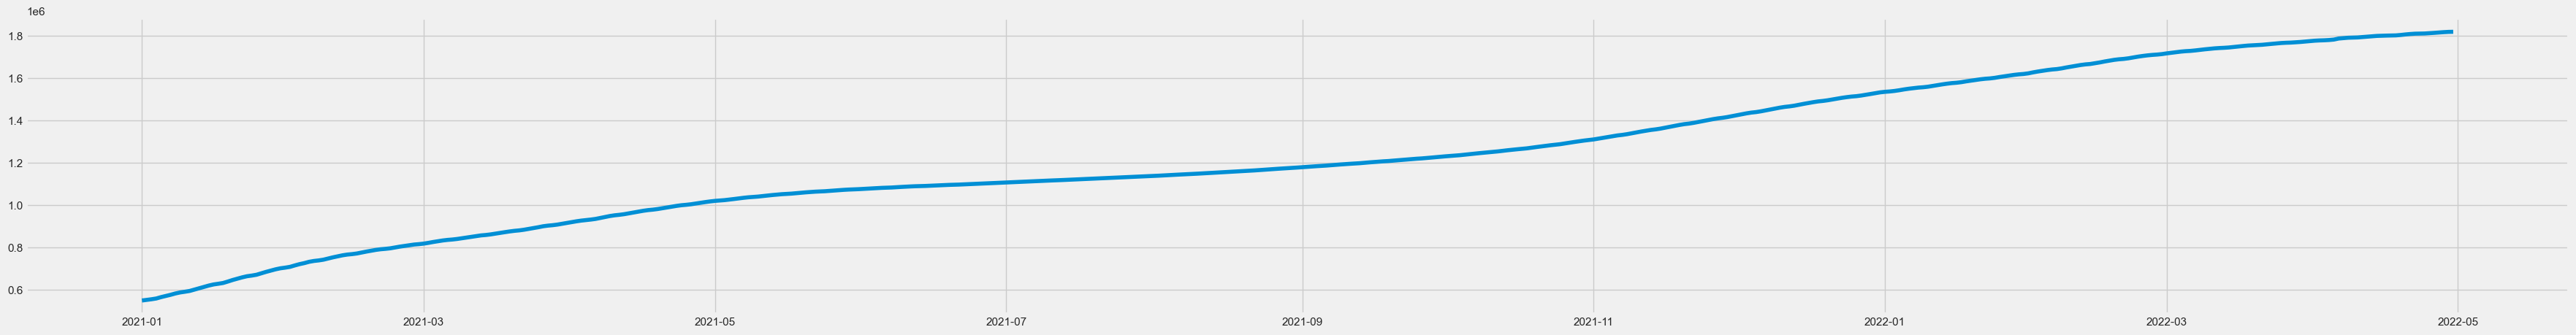

In [555]:
# Plot the data using matplotlib.

plt.figure(figsize=(40,5), dpi=100) 
# The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_sub_UML)

### 2. Subsetting, wrangling, and cleaning time-series data

In [556]:
df_sub_UML.describe()

,total_deaths
count,4.850000e+02
mean,1.235657e+06
std,3.392851e+05
min,5.501180e+05
25%,1.022363e+06
50%,1.178364e+06
75%,1.529685e+06
max,1.819698e+06


In [557]:
# Check for missing values (you shouldn't have any)

df_sub_UML.isnull().sum() 

total_deaths    0
dtype: int64

In [558]:
df_sub_UML.shape

(485, 1)

In [559]:
# Check for duplicates

dups = df_sub_UML.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [563]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub_UML, model='additive')

In [565]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

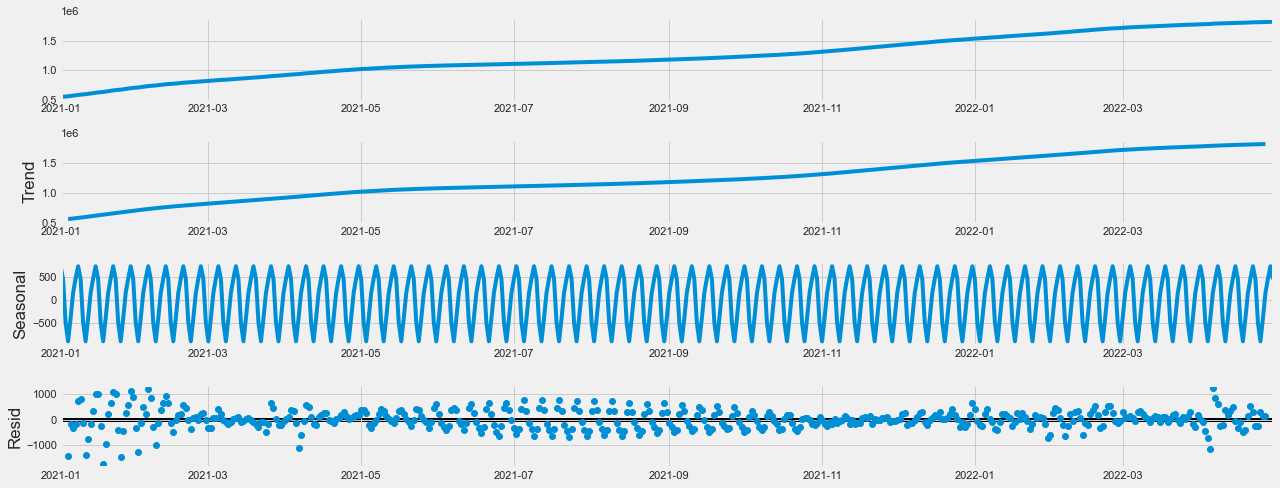

In [566]:
# Plot the separate components

decomposition.plot()
plt.show()

### Results:
We can that we have seasonal and non stationary data. This is due to the fact that we have depending of the time more varianz and less varaianz, especailly at the beggingin of 2021 and durinng autum 2021

### 4. Testing for stationarity

In [569]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub_UML['total_deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.157224
p-value                          0.943432
Number of Lags Used             18.000000
Number of Observations Used    466.000000
Critical Value (1%)             -3.444461
Critical Value (5%)             -2.867762
Critical Value (10%)            -2.570084
dtype: float64


The DF-Stationary test approves with the results from above, that we have non stationary data

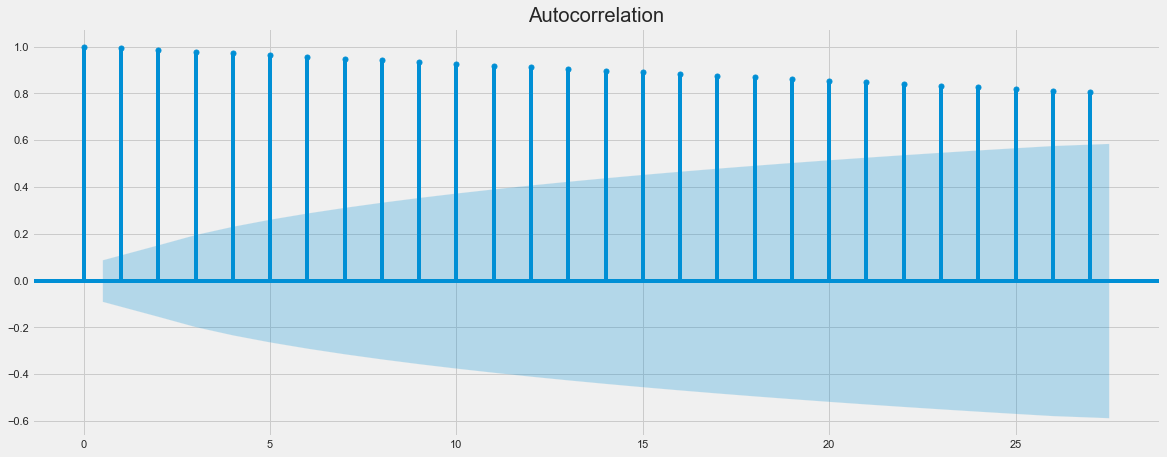

In [570]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub_UML)
plt.show()

- No of the point are within our 5% signifivant (blue area) that means we have higly autocorrelated data.
- That means we have to bring down autocorraltion and stationary

### 5. Stationarizing 

In [572]:
# By differencing the data we can get more stationary data
df_sub_UML["diff_1"] = df_sub_UML["total_deaths"].diff(periods=1)
df_sub_UML["diff_2"] = df_sub_UML["total_deaths"].diff(periods=2)
df_sub_UML["diff_3"] = df_sub_UML["total_deaths"].diff(periods=3)

In [581]:
# To remove non linerarity
transformed_ts1 = pd.Series(np.log(df_sub_UML["total_deaths"])).diff().dropna()

In [582]:
df_sub_UML.columns

Index(['total_deaths', 'diff_1', 'diff_2', 'diff_3'], dtype='object')

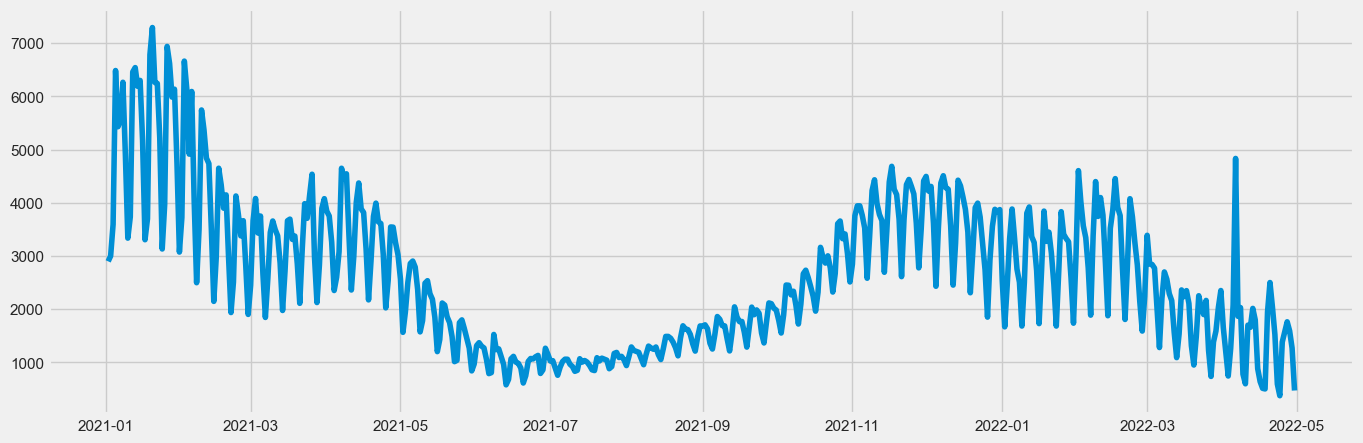

In [583]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_UML['diff_1'])

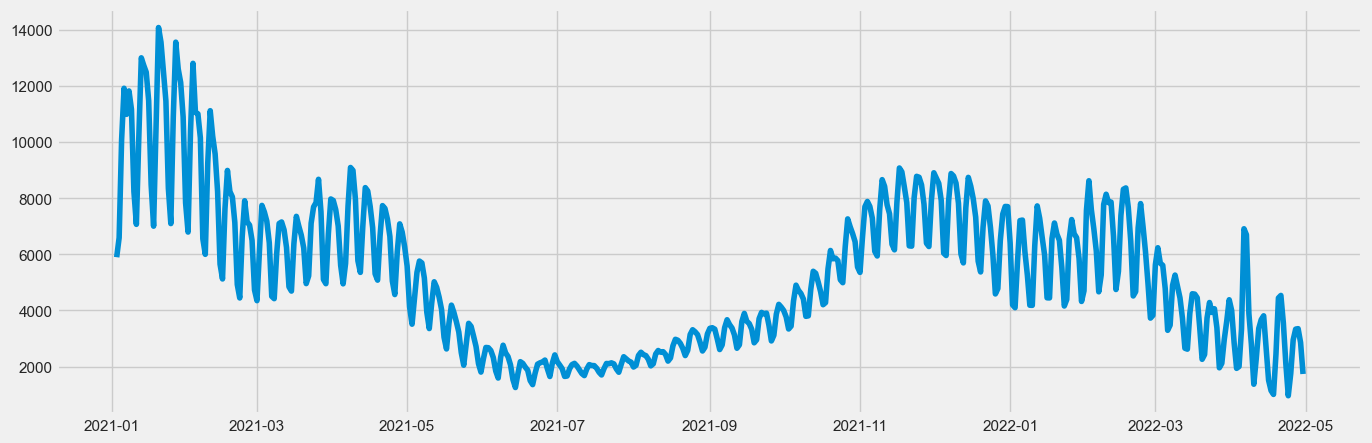

In [584]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_UML['diff_2'])

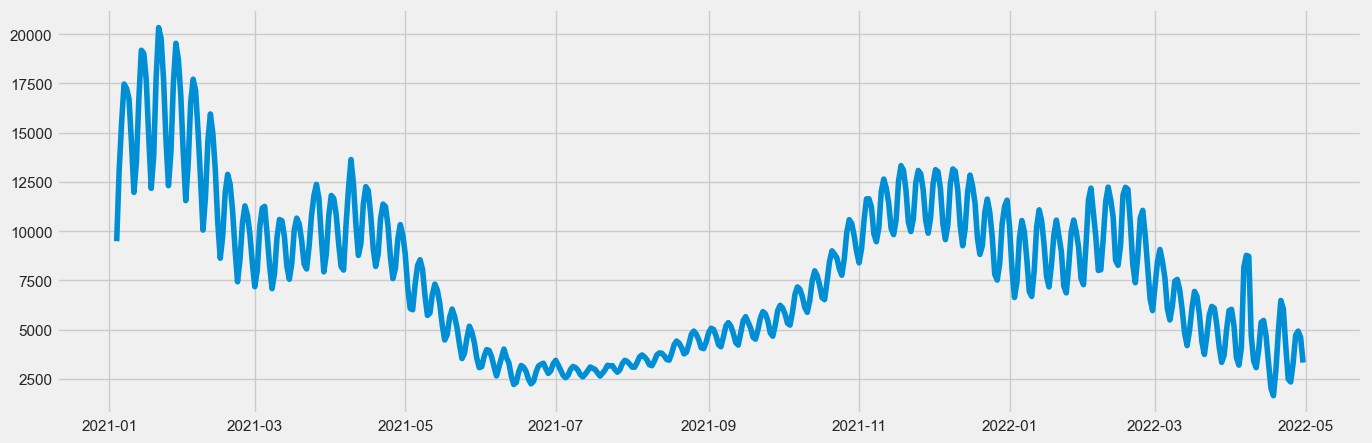

In [585]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_UML['diff_3'])

By differenciating the data we can see that the variance goes down which means we getting closer to a stationary data (variance and mean constant)

In [ ]:
data_dif

In [587]:
df_sub_UML.dropna(inplace=True)

In [589]:
dickey_fuller(df_sub_UML['diff_1'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.212785
p-value                          0.019256
Number of Lags Used             18.000000
Number of Observations Used    463.000000
Critical Value (1%)             -3.444553
Critical Value (5%)             -2.867803
Critical Value (10%)            -2.570106
dtype: float64


In [592]:
dickey_fuller(df_sub_UML['diff_2'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.453293
p-value                          0.009271
Number of Lags Used             18.000000
Number of Observations Used    463.000000
Critical Value (1%)             -3.444553
Critical Value (5%)             -2.867803
Critical Value (10%)            -2.570106
dtype: float64


In [595]:
dickey_fuller(df_sub_UML['diff_3'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.123329
p-value                          0.024874
Number of Lags Used             18.000000
Number of Observations Used    463.000000
Critical Value (1%)             -3.444553
Critical Value (5%)             -2.867803
Critical Value (10%)            -2.570106
dtype: float64


The test show the same results as the graphs and support that through differenicating we get stationary data

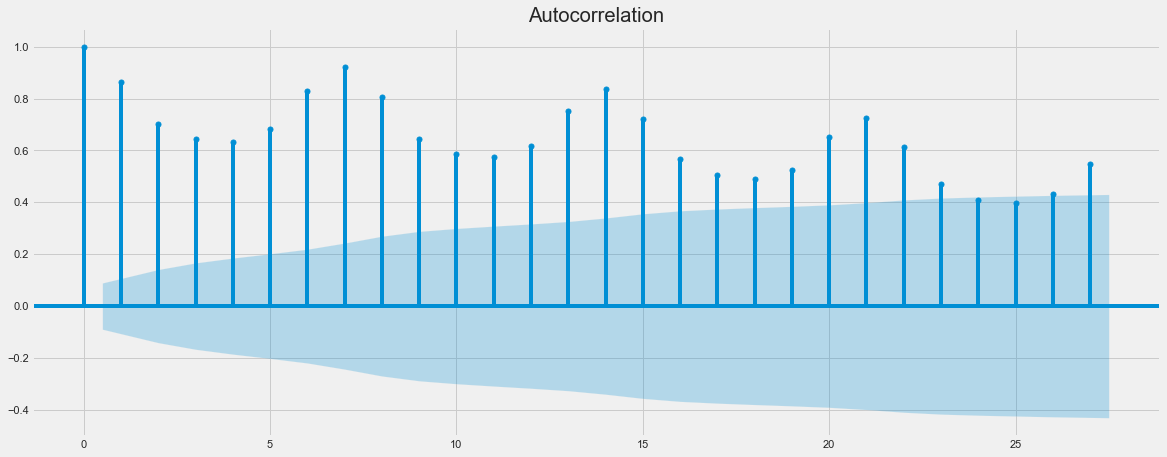

In [599]:
plot_acf(df_sub_UML['diff_1']) 
plt.show()

- With this methode we can reduce autocorrelation as well

In [601]:
# Saving the analysed data to excel for tabelau
df.to_excel('covid_excel.xlsx')